In [1]:
from astropy import units as u

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import pandas as pd

/opt/conda/igwn-py310-20240410/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
def m(size):
    # generate float number between 1 and 3 with size len(m)
    return np.random.uniform(1,3,size) * u.M_sun

In [4]:
# Generating dataset
size = 1000

m1_lst = []
m2_lst = []

while len(m1_lst) < size:
    m1 = m(1)
    m2 = m(1)
    # if m1 > m2:
    m1_lst.append(m1)
    m2_lst.append(m2)
        
m1 = np.array(m1_lst) * u.M_sun
m2 = np.array(m2_lst) * u.M_sun

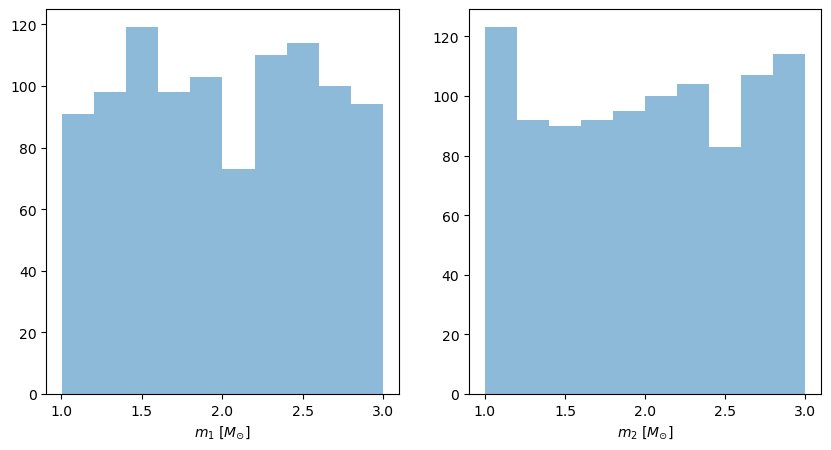

In [5]:
# two plots side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(m1, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_1$ $[M_{\odot}]$')
plt.subplot(1,2,2)
plt.hist(m2, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_2$ $[M_{\odot}]$')
plt.savefig('histogram_BNS.png')

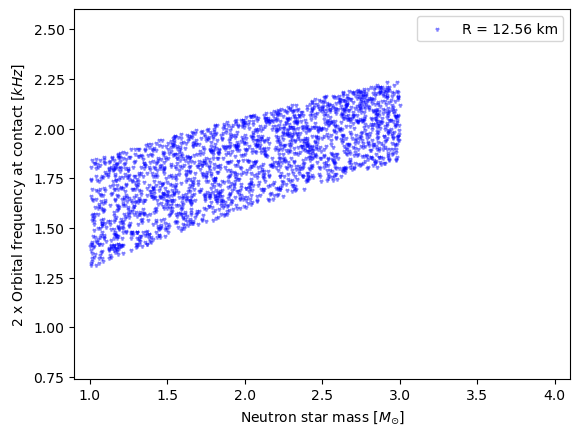

In [14]:
from astropy.constants import G

for a_val in [12.56]: # median from arXiv:2106.05313 PSR+GW+NICER
    a = a_val * u.km
    num = (4*np.pi**2) * (2.*a)**3
    dem = G*(m1+m2)
    P = np.sqrt(num/dem)
    f_kepler = (1/P).to(u.Hz) # this is an orbital frequency (GW frequency would be double)
    m_avg = (m1+m2)/2
    
    lower = np.percentile(f_kepler, 5)
    upper = np.percentile(f_kepler, 95)
    median = np.percentile(f_kepler, 50)
    mean = np.mean(f_kepler)
    
    plt.scatter(m1, 2.*f_kepler.to(u.kHz), alpha=0.5, s=10, marker = "1", label = f"R = {a}", c='b')
    plt.scatter(m2, 2.*f_kepler.to(u.kHz), alpha=0.5, s=10, marker = "1", c='b')
    # strongest resonance occurs when f-mode frequency is twice orbital frequency, cf. arXiv:astro-ph/9812116
    # so check if f-mode frequency is ever below twice orbital frequency at contact (which happens to be equal to the GW contact frequency)
plt.ylim(0.74, 2.6)
plt.xlim(0.9, 4.1)
plt.xlabel(r'Neutron star mass $[M_{\odot}]$')
plt.ylabel(r'2 x Orbital frequency at contact $[kHz]$')
plt.legend()
plt.savefig('contact_BNS.png')

In [15]:
df = pd.DataFrame({"m1": m1.value.squeeze(), "m2": m2.value.squeeze()})
df['f_kepler'] = f_kepler.value.squeeze()
df['f_contact'] = (2.*f_kepler).value.squeeze()
df.to_csv('contact_BNS.csv')

In [16]:
df

,m1,m2,f_kepler,f_contact
0,1.208541,1.265041,724.285130,1448.570260
1,1.722044,1.074783,770.157040,1540.314081
2,1.077903,1.664899,762.682460,1525.364920
3,2.237220,1.312982,867.706813,1735.413626
4,1.975450,1.729781,886.449766,1772.899533
...,...,...,...,...
995,1.580137,2.661734,948.473492,1896.946985
996,1.685571,1.219759,784.953996,1569.907992
997,1.191160,1.856806,803.991604,1607.983209
998,1.975068,2.450144,968.754056,1937.508113
